### Visualization of learning curves (training and validation set)

In [1]:
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append('../../hannes-imitation')
sys.path.append('../../hannes-imitation/hannes_imitation/external/diffusion_policy') # NOTE otherwise torch.load() fails

from hannes_imitation.common import plot_utils

In [11]:
import numpy as np
steps = 10
np.linspace(1, 0, 10).astype(np.int32).tolist()

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [2]:
# load model
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/preliminary_policy.pth'
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/preliminary_policy_wrist_FE.pth'
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/preliminary_policy_wrist_FE-tmp.pth'
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/grasp-ycb-table.pth'
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/grasp-ycb-table_2025_2_3-11_28_54.pth'
#policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/grasp-ycb-table_2025_2_3-13_12_55.pth'

policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/policy_1_4_2025_2_10-13_29_31.pth'

policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/policy_1_3_4_6_2025_2_12-15_0_34.pth'
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/policy_1-8_2025_2_18-14_13_56.pth'
policy_path = '/home/calessi-iit.local/Projects/hannes-imitation/trainings/policy_1_4_7_2025_2_19-21_10_9.pth'

checkpoint = torch.load(policy_path)

#policy = checkpoint['policy']
history = checkpoint['history']

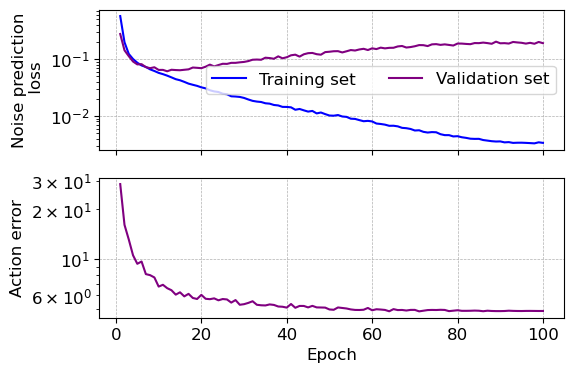

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,4), sharex=True)

# Learning curve on training and validation set
ax1.plot(history['epoch'], history['tr_loss'], label='Training set', color='blue')
ax1.plot(history['epoch'], history['vl_loss'], label='Validation set', color='purple')
ax1.set_yscale('log')
ax1.set_ylabel('Noise prediction\n loss')
ax1.grid(linewidth=0.5, linestyle='--')
ax1.legend(ncols=2)
#ax1.set_xlim([0,30])

# action errors on validation set
ax2.plot(history['epoch'], history['vl_action_error'], color='purple')
ax2.set_yscale('log')
ax2.set_xlabel("Epoch")
ax2.set_ylabel('Action error')
ax2.grid(linewidth=0.5, linestyle='--')
#ax2.set_xlim([0,30])
# save figure

plt.show()

In [4]:
print("Last training loss (MSE): %.4f" % history['tr_loss'][-1])
print("Last validation loss (MSE): %.4f" % history['vl_loss'][-1])
print("Last validation action prediction error (MAE): %.4f" % history['vl_action_error'][-1])

Last training loss (MSE): 0.0034
Last validation loss (MSE): 0.1898
Last validation action prediction error (MAE): 4.8301


Last training loss (MSE): 0.0043
Last validation loss (MSE): 0.0666
Last validation action prediction error (MAE): 3.9371